<h1 style="text-align:center">
Stock Portfolio Forecasting and Optimization on S&P500 Using
Machine Learning and Search Methods</h1>

---

- Constança Fernandes, nº 202205398
- Daniela Osório, nº 202208679
- Inês Amorim, nº 202108108
- Pedro Afonseca, nº 202105394

---

 ## == IMPORTS == 

In [ ]:
%pip install -r ../requirements.txt

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import yfinance as yf
from pathlib import Path
import pandas as pd

from stock_forecasting.features import *
from stock_forecasting.plots import *
from stock_forecasting.config import PROCESSED_DATA_DIR, RAW_DATA_DIR

/home/psuper/Documents/Escola/Universidade/3º Ano/1_sem/lab_ia/trab2/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


---

## 1. Introduction

---

## 2. Dataset Quality Assessment and Exploratory Data Analysis

### 2.1. Raw Dataset (S&P500)

The S&P500 dataset includes historical data (from 2010 to january 2024) on the 500 largest publicly traded companies in the U.S., measured by market capitalization. This was obtained using the library **yfinance**, from Yahoo Finance.

In [3]:
raw_data = pd.read_pickle(RAW_DATA_DIR / "raw.pkl")
raw_data

Ticker                            TYL                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2010-01-04 00:00:00+00:00   20.049999   20.309999   20.049999   20.299999   
2010-01-05 00:00:00+00:00   20.219999   21.360001   20.020000   20.780001   
2010-01-06 00:00:00+00:00   20.799999   21.520000   20.700001   20.770000   
2010-01-07 00:00:00+00:00   20.690001   20.840000   20.350000   20.500000   
2010-01-08 00:00:00+00:00   20.400000   20.740000   20.400000   20.740000   
...                               ...         ...         ...         ...   
2024-01-24 00:00:00+00:00  447.970001  451.709991  439.109985  439.290009   
2024-01-25 00:00:00+00:00  441.600006  441.600006  428.420013  429.250000   
2024-01-26 00:00:00+00:00  429.529999  432.589996  428.320007  430.619995   
2024-01-29 00:00:00+00:00  432.089996  436.410004  430.209991  436.410004   
2024-01-30 00:00:00+00:00  434.269989  437.000000  431.929993  432.059998   

Ticker                                             HAL                        \
Price                      Volume Repaired?       Open       High        Low   
Date                                                                           
2010-01-04 00:00:00+00:00  175300     False  24.386298  24.878470  24.338669   
2010-01-05 00:00:00+00:00  416700     False  24.830845  25.267448  24.600635   
2010-01-06 00:00:00+00:00  274600     False  25.196001  25.870752  25.116618   
2010-01-07 00:00:00+00:00  164100     False  25.648485  25.815188  25.338892   
2010-01-08 00:00:00+00:00   69000     False  26.156536  27.101187  25.791377   
...                           ...       ...        ...        ...        ...   
2024-01-24 00:00:00+00:00  252000     False  35.128161  36.378519  34.931253   
2024-01-25 00:00:00+00:00  230100     False  36.506506  36.673875  35.443208   
2024-01-26 00:00:00+00:00  153500     False  36.299751  37.274441  36.191452   
2024-01-29 00:00:00+00:00  148100     False  36.673877  36.782176  36.201301   
2024-01-30 00:00:00+00:00  136100     False  35.393981  36.437584  34.596508   

Ticker                                ...        MSFT                        \
Price                          Close  ...         Low       Close    Volume   
Date                                  ...                                     
2010-01-04 00:00:00+00:00  24.807026  ...   23.075748   23.347317  38409100   
2010-01-05 00:00:00+00:00  25.124559  ...   23.113469   23.354862  49749600   
2010-01-06 00:00:00+00:00  25.719927  ...   23.022945   23.211535  58182400   
2010-01-07 00:00:00+00:00  25.783434  ...   22.774012   22.970144  50559700   
2010-01-08 00:00:00+00:00  27.085310  ...   22.811729   23.128559  51197400   
...                              ...  ...         ...         ...       ...   
2024-01-24 00:00:00+00:00  36.260376  ...  398.273310  400.371826  24867000   
2024-01-25 00:00:00+00:00  36.427742  ...  400.342004  402.669281  21021200   
2024-01-26 00:00:00+00:00  36.949543  ...  400.242559  401.734406  17803300   
2024-01-29 00:00:00+00:00  36.614803  ...  402.132203  407.492920  24510200   
2024-01-30 00:00:00+00:00  36.240681  ...  404.240727  406.369080  33477600   

Ticker                                      ROK                          \
Price                     Repaired?        Open        High         Low   
Date                                                                      
2010-01-04 00:00:00+00:00     False   34.894110   35.150630   34.454359   
2010-01-05 00:00:00+00:00     False   34.923402   35.047997   34.549614   
2010-01-06 00:00:00+00:00     False   34.703534   35.385146   34.615585   
2010-01-07 00:00:00+00:00     False   35.341168   35.817561   35.033342   
2010-01-08 00:00:00+00:00     False   35.641667   36.286630   35.436448   
...                             ...         ...         ...         ...   
2024-01-24 00:00:0

This dataset has a multilayered header structure, because it includes stock prices from differnet companies and various market sectors. 

**Top Level:** Ticker Symbols for various stock market indices


- **^GSPC:** S&P500 Index. This includes 500 large-cap U.S. stocks and is widely used to represent the U.S. stock market.

**Why choose these indexes?**

Removed:
- GEV, SOLV, AMTM, GEHC: novos demais = não tem dados historicos
- SW: yahoo n tem dados historicos
- BF.B, BRK.B, ZT: n existe no yahoo

**Sub-categories:**

- **Open:** The opening price of the stock for the given day.
- **High:** The highest price during the day.
- **Low:** The lowest price.
- **Close:** The closing price.
- **Volume:** The number of shares traded.

### 2.2 Filter Stocks

We will only keep stocks based on:
- Liquity
- Dollar Liquity
- Mean Annual Return
- Annual Volatility

In [4]:
raw_data = delete_recent(raw_data, 0)
raw_data

Ticker                            TYL                                      \
Price                            Open        High         Low       Close   
Date                                                                        
2010-01-04 00:00:00+00:00   20.049999   20.309999   20.049999   20.299999   
2010-01-05 00:00:00+00:00   20.219999   21.360001   20.020000   20.780001   
2010-01-06 00:00:00+00:00   20.799999   21.520000   20.700001   20.770000   
2010-01-07 00:00:00+00:00   20.690001   20.840000   20.350000   20.500000   
2010-01-08 00:00:00+00:00   20.400000   20.740000   20.400000   20.740000   
...                               ...         ...         ...         ...   
2024-01-24 00:00:00+00:00  447.970001  451.709991  439.109985  439.290009   
2024-01-25 00:00:00+00:00  441.600006  441.600006  428.420013  429.250000   
2024-01-26 00:00:00+00:00  429.529999  432.589996  428.320007  430.619995   
2024-01-29 00:00:00+00:00  432.089996  436.410004  430.209991  436.410004   
2024-01-30 00:00:00+00:00  434.269989  437.000000  431.929993  432.059998   

Ticker                                             HAL                        \
Price                      Volume Repaired?       Open       High        Low   
Date                                                                           
2010-01-04 00:00:00+00:00  175300     False  24.386298  24.878470  24.338669   
2010-01-05 00:00:00+00:00  416700     False  24.830845  25.267448  24.600635   
2010-01-06 00:00:00+00:00  274600     False  25.196001  25.870752  25.116618   
2010-01-07 00:00:00+00:00  164100     False  25.648485  25.815188  25.338892   
2010-01-08 00:00:00+00:00   69000     False  26.156536  27.101187  25.791377   
...                           ...       ...        ...        ...        ...   
2024-01-24 00:00:00+00:00  252000     False  35.128161  36.378519  34.931253   
2024-01-25 00:00:00+00:00  230100     False  36.506506  36.673875  35.443208   
2024-01-26 00:00:00+00:00  153500     False  36.299751  37.274441  36.191452   
2024-01-29 00:00:00+00:00  148100     False  36.673877  36.782176  36.201301   
2024-01-30 00:00:00+00:00  136100     False  35.393981  36.437584  34.596508   

Ticker                                ...        MSFT                        \
Price                          Close  ...         Low       Close    Volume   
Date                                  ...                                     
2010-01-04 00:00:00+00:00  24.807026  ...   23.075748   23.347317  38409100   
2010-01-05 00:00:00+00:00  25.124559  ...   23.113469   23.354862  49749600   
2010-01-06 00:00:00+00:00  25.719927  ...   23.022945   23.211535  58182400   
2010-01-07 00:00:00+00:00  25.783434  ...   22.774012   22.970144  50559700   
2010-01-08 00:00:00+00:00  27.085310  ...   22.811729   23.128559  51197400   
...                              ...  ...         ...         ...       ...   
2024-01-24 00:00:00+00:00  36.260376  ...  398.273310  400.371826  24867000   
2024-01-25 00:00:00+00:00  36.427742  ...  400.342004  402.669281  21021200   
2024-01-26 00:00:00+00:00  36.949543  ...  400.242559  401.734406  17803300   
2024-01-29 00:00:00+00:00  36.614803  ...  402.132203  407.492920  24510200   
2024-01-30 00:00:00+00:00  36.240681  ...  404.240727  406.369080  33477600   

Ticker                                      ROK                          \
Price                     Repaired?        Open        High         Low   
Date                                                                      
2010-01-04 00:00:00+00:00     False   34.894110   35.150630   34.454359   
2010-01-05 00:00:00+00:00     False   34.923402   35.047997   34.549614   
2010-01-06 00:00:00+00:00     False   34.703534   35.385146   34.615585   
2010-01-07 00:00:00+00:00     False   35.341168   35.817561   35.033342   
2010-01-08 00:00:00+00:00     False   35.641667   36.286630   35.436448   
...                             ...         ...         ...         ...   
2024-01-24 00:00:0

/home/psuper/Documents/Escola/Universidade/3º Ano/1_sem/lab_ia/trab2/stock_forecasting/features.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[(ticker, "Dollar_Volume")] = data[(ticker, "Close")] * data[(ticker, "Volume")]
/home/psuper/Documents/Escola/Universidade/3º Ano/1_sem/lab_ia/trab2/stock_forecasting/features.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[(ticker, "Dollar_Volume")] = data[(ticker, "Close")] * data[(ticker, "Volume")]
/home/psuper/Documents/Escola/Universidade/3º Ano/1_sem/lab_ia/tra

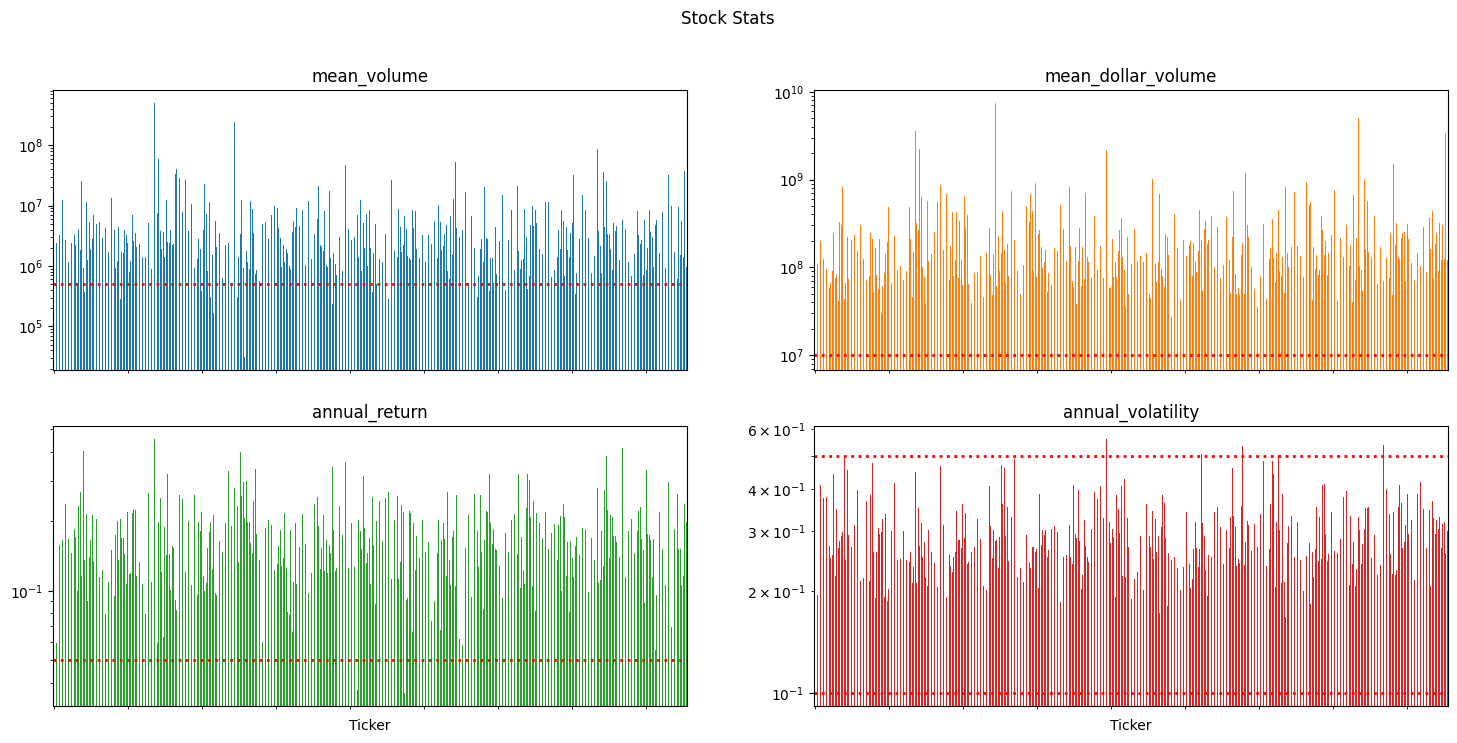

In [5]:
stock_stats = calculate_stock_stats(raw_data)
plot_stock_stats(stock_stats)

In [6]:
filtered_data, removed_stocks = filter_stocks(raw_data, stock_stats)
print(f"Stocks removed ({len(removed_stocks)}): {removed_stocks.to_list()}")
filtered_data

Stocks removed (37): ['TYL', 'BLDR', 'FRT', 'ESS', 'SNA', 'NDSN', 'ZBRA', 'HUBB', 'MTD', 'STE', 'AZO', 'NVR', 'FICO', 'AMD', 'ANSS', 'VTRS', 'WST', 'ROP', 'TFX', 'POOL', 'TDY', 'ERIE', 'WBA', 'WBD', 'NFLX', 'APA', 'MKTX', 'FDS', 'FSLR', 'MPWR', 'JKHY', 'IEX', 'FCX', 'TDG', 'PCG', 'EG', 'SMCI']


Ticker                           HAL                                   \
Price                           Open       High        Low      Close   
Date                                                                    
2010-01-04 00:00:00+00:00  24.386298  24.878470  24.338669  24.807026   
2010-01-05 00:00:00+00:00  24.830845  25.267448  24.600635  25.124559   
2010-01-06 00:00:00+00:00  25.196001  25.870752  25.116618  25.719927   
2010-01-07 00:00:00+00:00  25.648485  25.815188  25.338892  25.783434   
2010-01-08 00:00:00+00:00  26.156536  27.101187  25.791377  27.085310   
...                              ...        ...        ...        ...   
2024-01-24 00:00:00+00:00  35.128161  36.378519  34.931253  36.260376   
2024-01-25 00:00:00+00:00  36.506506  36.673875  35.443208  36.427742   
2024-01-26 00:00:00+00:00  36.299751  37.274441  36.191452  36.949543   
2024-01-29 00:00:00+00:00  36.673877  36.782176  36.201301  36.614803   
2024-01-30 00:00:00+00:00  35.393981  36.437584  34.596508  36.240681   

Ticker                                                 K             \
Price                        Volume Repaired?       Open       High   
Date                                                                  
2010-01-04 00:00:00+00:00  11571600     False  30.855259  31.005742   
2010-01-05 00:00:00+00:00  18989700     False  30.560060  30.664242   
2010-01-06 00:00:00+00:00  15720800     False  30.571646  30.756858   
2010-01-07 00:00:00+00:00   8993100     False  30.548492  30.976796   
2010-01-08 00:00:00+00:00  23014600     False  30.849461  30.895765   
...                             ...       ...        ...        ...   
2024-01-24 00:00:00+00:00  14417400     False  52.940986  52.979942   
2024-01-25 00:00:00+00:00  11492100     False  52.288473  53.330541   
2024-01-26 00:00:00+00:00   8835500     False  53.359764  53.651932   
2024-01-29 00:00:00+00:00   5857600     False  53.359760  53.466889   
2024-01-30 00:00:00+00:00  18937100     False  53.311068  53.856448   

Ticker                                           ...        MSFT              \
Price                            Low      Close  ...         Low       Close   
Date                                             ...                           
2010-01-04 00:00:00+00:00  30.426955  30.577438  ...   23.075748   23.347317   
2010-01-05 00:00:00+00:00  30.415363  30.646879  ...   23.113469   23.354862   
2010-01-06 00:00:00+00:00  30.444312  30.652676  ...   23.022945   23.211535   
2010-01-07 00:00:00+00:00  30.502188  30.953644  ...   22.774012   22.970144   
2010-01-08 00:00:00+00:00  30.675825  30.895765  ...   22.811729   23.128559   
...                              ...        ...  ...         ...         ...   
2024-01-24 00:00:00+00:00  52.025521  52.074219  ...  398.273310  400.371826   
2024-01-25 00:00:00+00:00  52.113171  53.203938  ...  400.342004  402.669281   
2024-01-26 00:00:00+00:00  53.233156  53.311069  ...  400.242559  401.734406   
2024-01-29 00:00:00+00:00  53.116286  53.359760  ...  402.132203  407.492920   
2024-01-30 00:00:00+00:00  53.077331  53.846710  ...  404.240727  406.369080   

Ticker                                                ROK              \
Price                        Volume Repaired?        Open        High   
Date                                                                    
2010-01-04 00:00:00+00:00  38409100     False   34.894110   35.150630   
2010-01-05 00:00:00+00:00  49749600     False   34.923402   35.047997   
2010-01-06 00:00:00+00:00  58182400     False   34.703534   35.385146   
2010-01-07 00:00:00+00:00  50559700     False   35.341168   35.817561   
2010-01-08 00:00:00+00:00  51197400     False   35.641667   36.286630   
...                             ...       ...         ...         ...   
2024-01-24 00:00:00+00:00  24867000     False  301.659200  301.659200   
2024-01-25 00:00:00+00:00  21021200     False  297.722821  301.345090   
2024-01-26 00:00:00+00:00  17803300     False  300.147519 

In [7]:
filtered_data.to_pickle(PROCESSED_DATA_DIR / "filtered.pkl")

In [8]:
filtered_data = pd.read_pickle(PROCESSED_DATA_DIR / "filtered.pkl")

In [9]:
# Dont explode memory
del raw_data, removed_stocks, stock_stats

### 2.3 Feature enginnering

New features:

- Close_Ratio_X: was the stock price today higher than it was last X days?
- Trend_X: by how much the price went up in the previous days

In [14]:
processed = extract_features(filtered_data)
processed

/home/psuper/Documents/Escola/Universidade/3º Ano/1_sem/lab_ia/trab2/stock_forecasting/features.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_all[(ticker, "Target")] = data_all[(ticker, "Close")].pct_change(fill_method=None)
/home/psuper/Documents/Escola/Universidade/3º Ano/1_sem/lab_ia/trab2/stock_forecasting/features.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_all[(ticker, "Target")] = data_all[(ticker, "Close")].pct_change(fill_method=None)
/home/psuper/Documents/Escola/Universidade/3º Ano/1_sem/la

Ticker                              HAL                                    \
Price                     Close_Ratio_2   Trend_2 Close_Ratio_5   Trend_5   
Date                                                                        
2010-01-04 00:00:00+00:00           NaN       NaN           NaN       NaN   
2010-01-05 00:00:00+00:00      1.006359       NaN           NaN       NaN   
2010-01-06 00:00:00+00:00      1.011710       NaN           NaN       NaN   
2010-01-07 00:00:00+00:00      1.001233  0.036497           NaN       NaN   
2010-01-08 00:00:00+00:00      1.024625  0.026166      1.053737       NaN   
...                                 ...       ...           ...       ...   
2024-01-24 00:00:00+00:00      1.021212  0.038810      1.059307  0.052673   
2024-01-25 00:00:00+00:00      1.002303  0.068611      1.042077  0.104073   
2024-01-26 00:00:00+00:00      1.007111  0.047959      1.036225  0.106583   
2024-01-29 00:00:00+00:00      0.995450  0.018940      1.011422  0.101093   
2024-01-30 00:00:00+00:00      0.994865  0.005265      0.992933  0.078492   

Ticker                                                                        \
Price                     Close_Ratio_60  Trend_60 Close_Ratio_250 Trend_250   
Date                                                                           
2010-01-04 00:00:00+00:00            NaN       NaN             NaN       NaN   
2010-01-05 00:00:00+00:00            NaN       NaN             NaN       NaN   
2010-01-06 00:00:00+00:00            NaN       NaN             NaN       NaN   
2010-01-07 00:00:00+00:00            NaN       NaN             NaN       NaN   
2010-01-08 00:00:00+00:00            NaN       NaN             NaN       NaN   
...                                  ...       ...             ...       ...   
2024-01-24 00:00:00+00:00       1.006141 -0.122418        1.025281 -0.039847   
2024-01-25 00:00:00+00:00       1.011902 -0.056044        1.030389 -0.001273   
2024-01-26 00:00:00+00:00       1.027201 -0.055231        1.045413 -0.020890   
2024-01-29 00:00:00+00:00       1.018814 -0.036361        1.036223  0.005142   
2024-01-30 00:00:00+00:00       1.009527 -0.043391        1.026056  0.000525   

Ticker                                K            ...       IPG       CMI  \
Price                     Close_Ratio_2   Trend_2  ...    Target    Target   
Date                                               ...                       
2010-01-04 00:00:00+00:00           NaN       NaN  ...       NaN       NaN   
2010-01-05 00:00:00+00:00      1.001134       NaN  ... -0.010624  0.023647   
2010-01-06 00:00:00+00:00      1.000095       NaN  ...  0.000000  0.009157   
2010-01-07 00:00:00+00:00      1.004885  0.002460  ... -0.025504  0.050732   
2010-01-08 00:00:00+00:00      0.999064  0.010008  ...  0.001378  0.053386   
...                                 ...       ...  ...       ...       ...   
2024-01-24 00:00:00+00:00      0.990919  0.009735  ... -0.001549 -0.001694   
2024-01-25 00:00:00+00:00      1.010731 -0.002329  ...  0.021409  0.012935   
2024-01-26 00:00:00+00:00      1.001006  0.003696  ...  0.001823  0.007452   
2024-01-29 00:00:00+00:00      1.000456  0.023708  ...  0.012735  0.000956   
2024-01-30 00:00:00+00:00      1.004542  0.002927  ... -0.003892  0.008054   

Ticker                           EA      MSCI      SCHW       DLR        DD  \
Price                        Target    Target    Target    Target    Target   
Date                                                                          
2010-01-04 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2010-01-05 00:00:00+00:00  0.028099  0.003753 -0.003034  0.006580  0.044551   
2010-01-06 00:00:00+00:00 -0.025723 -0.027103 -0.018255 -0.013471  0.017717   
2010-01-07 00:00:00+00:00 -0.007701  0.068844 -0.003616  0.008835  0.000645   
2010-01-08 00:00:00+00:00  0.019956  0.033553 -0.006740  0.011147  0.003543   
...                             ...       ...       ...       ...       ...

In [11]:
processed.dropna(inplace=True)
processed

Ticker                              HAL                                    \
Price                     Close_Ratio_2   Trend_2 Close_Ratio_5   Trend_5   
Date                                                                        
2010-12-31 00:00:00+00:00      0.997801  0.034612      1.010544  0.015206   
2011-01-03 00:00:00+00:00      0.999019  0.003476      1.004139  0.013044   
2011-01-04 00:00:00+00:00      0.985056 -0.006349      0.974955  0.022493   
2011-01-05 00:00:00+00:00      0.998354 -0.031407      0.977872 -0.001184   
2011-01-06 00:00:00+00:00      0.984544 -0.032735      0.961412 -0.031219   
...                                 ...       ...           ...       ...   
2024-01-24 00:00:00+00:00      1.021212  0.038810      1.059307  0.052673   
2024-01-25 00:00:00+00:00      1.002303  0.068611      1.042077  0.104073   
2024-01-26 00:00:00+00:00      1.007111  0.047959      1.036225  0.106583   
2024-01-29 00:00:00+00:00      0.995450  0.018940      1.011422  0.101093   
2024-01-30 00:00:00+00:00      0.994865  0.005265      0.992933  0.078492   

Ticker                                                                        \
Price                     Close_Ratio_60  Trend_60 Close_Ratio_250 Trend_250   
Date                                                                           
2010-12-31 00:00:00+00:00       1.111599  0.205692        1.306845  0.375537   
2011-01-03 00:00:00+00:00       1.105802  0.203945        1.302827  0.358348   
2011-01-04 00:00:00+00:00       1.070865  0.212289        1.263257  0.332691   
2011-01-05 00:00:00+00:00       1.064969  0.149825        1.258187  0.300775   
2011-01-06 00:00:00+00:00       1.030942  0.151433        1.219133  0.246995   
...                                  ...       ...             ...       ...   
2024-01-24 00:00:00+00:00       1.006141 -0.122418        1.025281 -0.039847   
2024-01-25 00:00:00+00:00       1.011902 -0.056044        1.030389 -0.001273   
2024-01-26 00:00:00+00:00       1.027201 -0.055231        1.045413 -0.020890   
2024-01-29 00:00:00+00:00       1.018814 -0.036361        1.036223  0.005142   
2024-01-30 00:00:00+00:00       1.009527 -0.043391        1.026056  0.000525   

Ticker                                K            ...       IPG       CMI  \
Price                     Close_Ratio_2   Trend_2  ...    Target    Target   
Date                                               ...                       
2010-12-31 00:00:00+00:00      0.999609 -0.000586  ... -0.000941 -0.001362   
2011-01-03 00:00:00+00:00      0.998038 -0.000587  ...  0.013183  0.015816   
2011-01-04 00:00:00+00:00      1.004013 -0.004698  ... -0.026951 -0.001342   
2011-01-05 00:00:00+00:00      0.997851  0.004143  ...  0.014326  0.012455   
2011-01-06 00:00:00+00:00      0.998529  0.003769  ... -0.000941 -0.025046   
...                                 ...       ...  ...       ...       ...   
2024-01-24 00:00:00+00:00      0.990919  0.009735  ... -0.001549 -0.001694   
2024-01-25 00:00:00+00:00      1.010731 -0.002329  ...  0.021409  0.012935   
2024-01-26 00:00:00+00:00      1.001006  0.003696  ...  0.001823  0.007452   
2024-01-29 00:00:00+00:00      1.000456  0.023708  ...  0.012735  0.000956   
2024-01-30 00:00:00+00:00      1.004542  0.002927  ... -0.003892  0.008054   

Ticker                           EA      MSCI      SCHW       DLR        DD  \
Price                        Target    Target    Target    Target    Target   
Date                                                                          
2010-12-31 00:00:00+00:00 -0.014440 -0.011418 -0.002332  0.001360 -0.003212   
2011-01-03 00:00:00+00:00  0.000000  0.012577  0.022794  0.011060  0.024605   
2011-01-04 00:00:00+00:00  0.000000 -0.016477 -0.016000 -0.021685 -0.006861   
2011-01-05 00:00:00+00:00 -0.006105  0.013403  0.049942  0.004708 -0.001727   
2011-01-06 00:00:00+00:00 -0.003071 -0.007630 -0.006084  0.013666  0.019031   
...                             ...       ...       ...       ...       ...

In [12]:
processed.to_pickle(PROCESSED_DATA_DIR / "final.pkl")

In [13]:
processed = pd.read_pickle(PROCESSED_DATA_DIR / "final.pkl")

---

## 3. Application of ML algorithms for Stock Price Predicition

---

## 4. Application of Oprimization Techniques for Selection of Stocks

---

## 5. Application of Optimization Techniques for Selection of Stocks

---

## 6. Assess Portfolio Performance

---

## 7. Bibliography